In [1]:
import numpy as np
from numpy import random as rand
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

# SIR model

### Deterministic

In [2]:
# The SIR model differential equations.
def SIRd_eq(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Ro =  2.0
N/S(0) =  1.02040816327


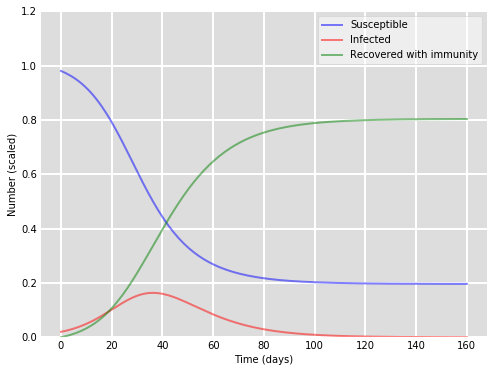

In [26]:
# Total population, N.
N = 1000.0

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 20, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 

##Basic reproduction number

Ro=beta/gamma; print 'Ro = ', Ro
print 'N/S(0) = ', N/S0

# A grid of time points (in days)
tvec = np.linspace(0, 160, 160)

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(SIRd_eq, y0, tvec, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(tvec, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(tvec, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(tvec, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (scaled)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
Sd, Id, Rd = S, I, R
tvecd = tvec

### Stochastic

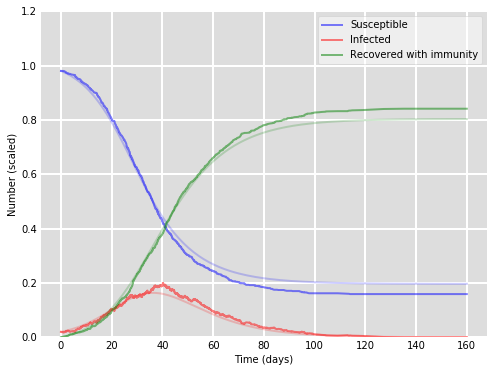

In [5]:
# Total population, N.
N = 1000.0

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 20, 0
I, R = [], []

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
S = []

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 

##Time
Tmax=160; tvec=[]; tt=0;

##Gillespie
while (tt<Tmax):
    
    S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
    
    if I0 == 0: 
        tt = Tmax;
        S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
        break
    
    ##Probabilities
    p1 = beta*S0*I0/N ##Susc. to Inf.
    p2 = gamma*I0 ##Inf. to Rem. 
    pvec = np.array([p1, p2]); pnorm = pvec/sum(pvec);
    
    ##Choose event
    event = np.random.choice(range(len(pvec)), 1, replace=False , p=pnorm);  ##Random wighted choice
    event = event[0];
    
    if event == 0: S0 = S0 - 1; I0 = I0 + 1;
     
    elif event == 1: I0 = I0 - 1; R0 = R0 + 1;
        
    ##Time
    tau = 1/sum(pvec);
    dt = np.random.exponential(tau); tt += dt;

    
S = np.asarray(S);
I = np.asarray(I);
R = np.asarray(R);
tvec = np.asarray(tvec);

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(tvec, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(tvecd, Sd/N, '-b', alpha=0.2, lw=2)
ax.plot(tvec, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(tvecd, Id/N, '-r', alpha=0.2, lw=2)
ax.plot(tvec, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(tvecd, Rd/N, '-g', alpha=0.2, lw=2)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (scaled)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

### Network

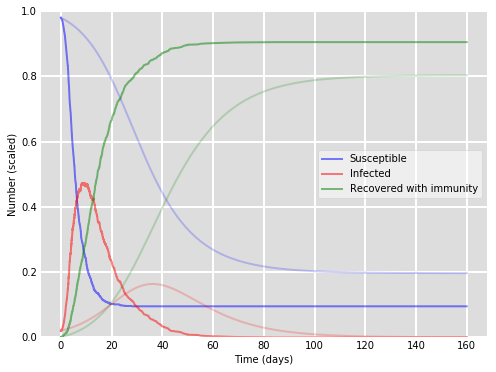

In [28]:
# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 20, 0
I, R = [], []

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
S = []

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 

##Time
Tmax=160; tvec=[]; tt=0;

##Network
G=nx.barabasi_albert_graph(N,2);

##Node attributes
Inf=list(rand.choice(range(N), I0, replace=False));
Susc=G.nodes();  
for xx in Inf: Susc.remove(xx);
Rem = [];

##Gillespie
while (tt<Tmax):
    
    S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
    
    if I0 == 0: 
        tt = Tmax;
        S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
        break
        
    ##Neighbors
    nInfvec = np.zeros(N);
    for zz in Susc:
        neighbors = G.neighbors(zz);
        for ii in xrange(len(neighbors)):
            if Inf.count(neighbors[ii]) == 1:
                nInfvec[zz] += 1; 
        
    ##Time
    p1vec=beta*nInfvec
    p1 = sum(p1vec) ##Susc. to Inf.
    Ivec=np.zeros(N); Ivec[Inf]=1; p2vec=gamma*Ivec;
    p2 = sum(p2vec) ##Inf. to Rem.  
    pvec = np.array([p1, p2]);
    tau = 1/sum(pvec);
    dt = np.random.exponential(tau); tt += dt;
    
    #Probabilities
    pch = np.concatenate((p1vec,p2vec))
    pnorm = pch/sum(pch);
    
    ##Choose event
    event = np.random.choice(range(len(pch)), 1, replace=False , p=pnorm);  ##Random wighted choice
    event = event[0];
    
    ##target
    if event >= N: target = event - N;
    else: target = event;
    
    ##Dynamics    
    if (event < N): 
        S0 = S0 - 1; I0 = I0 + 1;
        Susc.remove(target); Inf.append(target);
     
    elif (event >= N): 
        I0 = I0 - 1; R0 = R0 + 1;
        Inf.remove(target); Rem.append(target);
    
S = np.asarray(S);
I = np.asarray(I);
R = np.asarray(R);
tvec = np.asarray(tvec);
N = float(N);

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(tvec, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(tvecd, Sd/N, '-b', alpha=0.2, lw=2)
ax.plot(tvec, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(tvecd, Id/N, '-r', alpha=0.2, lw=2)
ax.plot(tvec, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(tvecd, Rd/N, '-g', alpha=0.2, lw=2)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (scaled)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
Sv, Iv, Rv = S, I, R
tvecv = tvec

# SIR model with vital dynamics

### Deterministic

In [8]:
#The SIR model differential equations.
def SIRvd_eq(y, t, beta, gamma, delta, mu):
    S, I, R, N = y
    
    dS = delta * N - beta * I * S / N - mu * S
    dI = beta * I * S / N - (gamma + mu) * I
    dR = gamma * I - mu * R
    dN = (delta - mu) * N
    
    dy = [ dS, dI, dR, dN ]

    return dy

Ro = 1.66666666667
I* = 66.6666666667
S* = 600.0


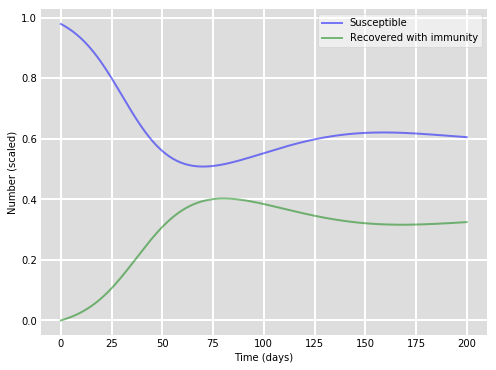

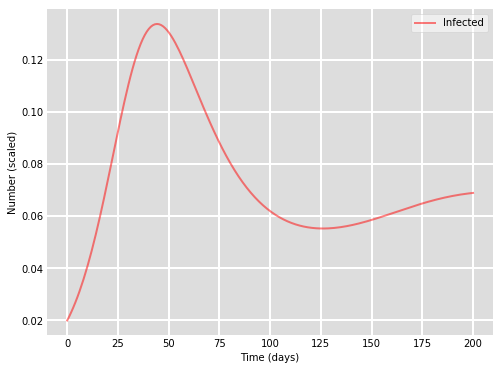

In [13]:
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta , gamma  = .2 , 1.0/10.0

# Birth rate, delta, and death rate, mu, (in 1/days).
delta , mu = 1.0 / 50 , 1.0 / 50  

# Total population, N.
N0 = 1000.0

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 20., 0.

# Everyone else, S0, is susceptible to infection initially.
S0 = N0 - I0 - R0

# Initial conditions vector
y0 = S0, I0, R0, N0

# A grid of time points (in days)
tMax = 200
tvec = np.linspace(0, tMax, tMax)

## Outbreak
Ro = beta/(gamma + mu)
print 'Ro =', Ro
print 'I* =', (S0 + I0 + R0)*mu*(Ro-1)/beta
print 'S* =', (S0 + I0 + R0)/Ro


# Integrate the ODE
solution = odeint(SIRvd_eq, y0, tvec, args = (beta, gamma, delta, mu))
        
S = solution[:, 0]
I = solution[:, 1]
R = solution[:, 2]
N = solution[:, 3]

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(tvec, S/N0, 'b', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(tvec, I/N0, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(tvec, R/N0, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (scaled)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
#ax.plot(tvec, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(tvec, I/N0, 'r', alpha=0.5, lw=2, label='Infected')
#ax.plot(tvec, R/N0, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (scaled)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
Sd, Id, Rd = S, I, R
tvecd = tvec

### Stochastic

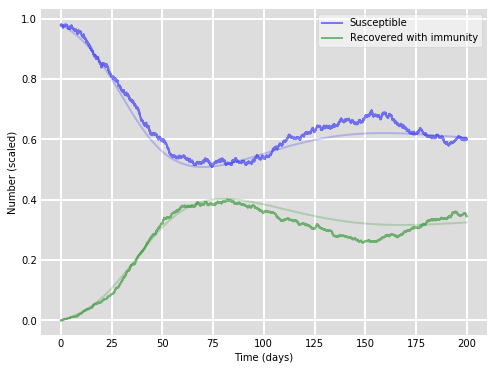

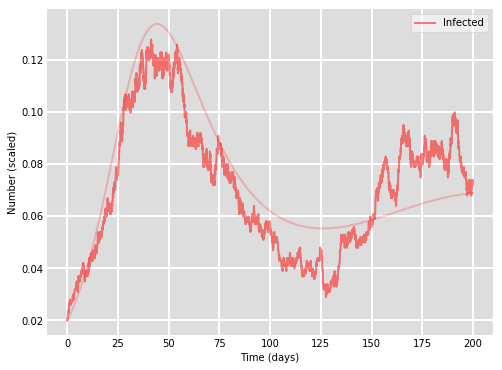

In [23]:
# Total population, N.
N0 = 1000.0
N=[];

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 20, 0
I, R = [], []

# Everyone else, S0, is susceptible to infection initially.
S0 = N0 - I0 - R0
S = []

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta , gamma  = .2 , 1.0/10.0

# Birth rate, delta, and death rate, mu, (in 1/days).
delta , mu = 1.0 / 50 , 1.0 / 50 

##Time
Tmax=200; tvec=[]; tt=0;

##Gillespie
while (tt<Tmax):
    
    S.append(S0); I.append(I0); R.append(R0); N.append(N0); tvec.append(tt);
    
    ##Probabilities
    p1 = beta*S0*I0/N0 ##Susc. to Inf.
    p2 = gamma*I0 ##Inf. to Rem.
    p3 = delta*N0 ##Newborn
    p4 = mu*S0 ##Sucs. death
    p5 = mu*I0 ##Inf. death
    p6 = mu*R0 ##Rem. death
    pvec = np.array([p1, p2, p3, p4, p5, p6]); pnorm = pvec/sum(pvec);
    
    ##Choose event
    event = np.random.choice(range(len(pvec)), 1, replace=False , p=pnorm);  ##Random wighted choice
    event = event[0];
    
    if event == 0: S0 = S0 - 1; I0 = I0 + 1;
     
    elif event == 1: I0 = I0 - 1; R0 = R0 + 1;
        
    elif event == 2: S0 = S0 + 1;
        
    elif event == 3: S0 = S0 - 1;
    
    elif event == 4: I0 = I0 - 1;
        
    elif event == 5: R0 = R0 - 1;
        
    ##Time
    tau = 1/sum(pvec);
    dt = np.random.exponential(tau); tt += dt;

    
S = np.asarray(S);
I = np.asarray(I);
R = np.asarray(R);
N = np.asarray(N);
tvec = np.asarray(tvec);

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(tvec, S/np.float_(N), 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(tvecd, Sd/N[0], 'b', alpha=0.2, lw=2)
#ax.plot(tvec, I/np.float_(N), 'r', alpha=0.5, lw=2, label='Infected')
#ax.plot(tvecd, Id/N[0], 'r', alpha=0.2, lw=2)
ax.plot(tvec, R/np.float_(N), 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(tvecd, Rd/N[0], 'g', alpha=0.2, lw=2)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (scaled)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
#ax.plot(tvec, S/np.float_(N), 'b', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(tvecd, Sd/N[0], 'b', alpha=0.2, lw=2)
ax.plot(tvec, I/np.float_(N), 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(tvecd, Id/N[0], 'r', alpha=0.2, lw=2)
#ax.plot(tvec, R/np.float_(N), 'g', alpha=0.5, lw=2, label='Recovered with immunity')
#ax.plot(tvecd, Rd/N[0], 'g', alpha=0.2, lw=2)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (scaled)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

### Network

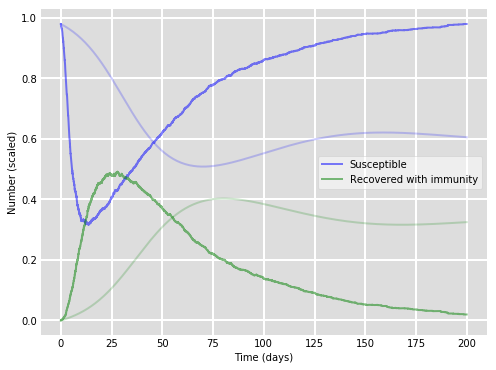

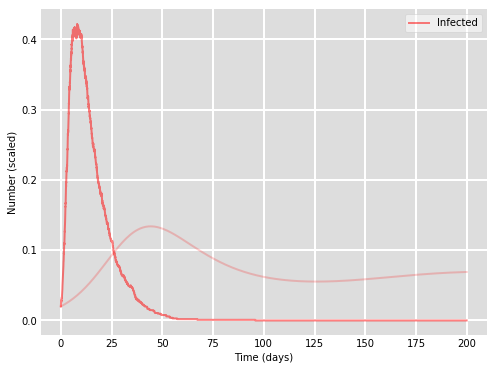

In [25]:
# Total population, N.
N0 = 1000; Nborn = 1000;
N = []

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 20, 0
I, R = [], []

# Everyone else, S0, is susceptible to infection initially.
S0 = N0 - I0 - R0
S = []

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta , gamma  = .2 , 1.0/10.0

# Birth rate, delta, and death rate, mu, (in 1/days).
delta , mu = 1.0 / 50 , 1.0 / 50 

##Time
Tmax=200; tvec=[]; tt=0;

##Network
G=nx.barabasi_albert_graph(N0,2);

##Node attributes
Inf=list(rand.choice(range(N0), I0, replace=False));
Susc=G.nodes();
for xx in Inf: Susc.remove(xx);
Rem = [];
Dead = [];

##Gillespie
while (tt<Tmax):
    
    S.append(S0); I.append(I0); R.append(R0); N.append(N0); tvec.append(tt);
    
    ##Neighbors
    nInfvec = np.zeros(Nborn);
    for zz in Susc:
        neighbors = G.neighbors(zz);
        for ii in xrange(len(neighbors)):
            if Inf.count(neighbors[ii]) == 1:
                nInfvec[zz] += 1;
    
    ##Time
    p1vec=beta*nInfvec
    p1 = sum(p1vec) ##Susc. to Inf.
    Ivec=np.zeros(Nborn); Ivec[Inf]=1; p2vec=gamma*Ivec;
    p2 = sum(p2vec) ##Inf. to Rem.
    Live = np.ones(Nborn); Live[Dead] = 0; p3vec = delta*Live;
    p3 = sum(p3vec);
    p4vec = np.zeros(Nborn); p4vec[Susc] = 1; p4vec = mu*p4vec;
    p4 = sum(p4vec);
    p5vec = np.zeros(Nborn); p5vec[Inf] = 1; p5vec = mu*p5vec;
    p5 = sum(p5vec);
    p6vec = np.zeros(Nborn); p6vec[Rem] = 1; p6vec = mu*p6vec;
    p6 = sum(p6vec); 
    pvec = np.array([p1, p2, p3, p4, p5, p6]);
    tau = 1/sum(pvec);
    dt = np.random.exponential(tau); tt += dt;
    
    #Probabilities
    pch = np.concatenate((p1vec,p2vec,p3vec,p4vec,p5vec,p6vec))
    pnorm = pch/sum(pch);
    
    ##Choose event
    event = np.random.choice(range(len(pch)), 1, replace=False , p=pnorm);  ##Random wighted choice
    event = event[0];
    
    ##target
    if 2*Nborn > event >= Nborn: target = event - Nborn;
    elif 3*Nborn > event >= 2*Nborn: target = event - 2*Nborn;
    elif 4*Nborn > event >= 3*Nborn: target = event - 3*Nborn;
    elif 5*Nborn > event >= 4*Nborn: target = event - 4*Nborn;
    elif 6*Nborn > event >= 5*Nborn: target = event - 5*Nborn;
    else: target = event;
    
    ##Dynamics    
    if (event < Nborn): 
        S0 = S0 - 1; I0 = I0 + 1;
        Susc.remove(target); Inf.append(target);
     
    elif ( Nborn <= event < 2*Nborn): 
        I0 = I0 - 1; R0 = R0 + 1;
        Inf.remove(target); Rem.append(target);
        
    elif ( 2*Nborn <= event < 3*Nborn ):
        N0 = N0 + 1; S0 = S0 + 1;
        G.add_edge(target, Nborn); 
        Susc.append(Nborn); Nborn += 1;
        
    elif ( 3*Nborn <= event < 4*Nborn ):
        S0 = S0 - 1; N0 = N0 - 1;
        G.remove_node(target); Susc.remove(target); Dead.append(target);
        
    elif ( 4*Nborn <= event < 5*Nborn ):
        I0 = I0 - 1; N0 = N0 - 1;
        G.remove_node(target); Inf.remove(target); Dead.append(target);
        
    elif ( 5*Nborn <= event < 6*Nborn):
        R0 = R0 - 1; N0 = N0 - 1;
        G.remove_node(target); Rem.remove(target); Dead.append(target);
    
S = np.asarray(S);
I = np.asarray(I);
R = np.asarray(R);
N = np.asarray(N);
tvec = np.asarray(tvec);

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(tvec, S/np.float_(N), 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(tvecd, Sd/N[0], 'b', alpha=0.2, lw=2)
#ax.plot(tvec, I/np.float_(N), 'r', alpha=0.5, lw=2, label='Infected')
#ax.plot(tvecd, Id/N[0], 'r', alpha=0.2, lw=2)
ax.plot(tvec, R/np.float_(N), 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(tvecd, Rd/N[0], 'g', alpha=0.2, lw=2)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (scaled)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
#ax.plot(tvec, S/np.float_(N), 'b', alpha=0.5, lw=2, label='Susceptible')
#ax.plot(tvecd, Sd/N[0], 'b', alpha=0.2, lw=2)
ax.plot(tvec, I/np.float_(N), 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(tvecd, Id/N[0], 'r', alpha=0.2, lw=2)
#ax.plot(tvec, R/np.float_(N), 'g', alpha=0.5, lw=2, label='Recovered with immunity')
#ax.plot(tvecd, Rd/N[0], 'g', alpha=0.2, lw=2)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (scaled)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

# Vaccine on SIR

### High degree nodes

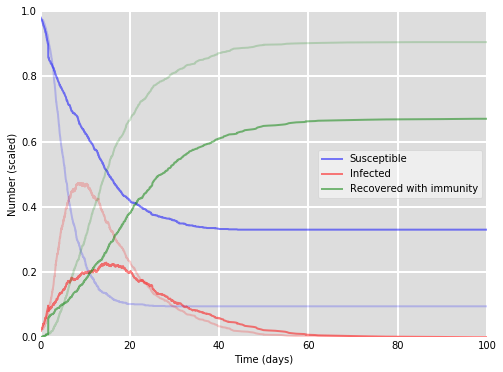

In [39]:
# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 20, 0
I, R = [], []

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
S = []

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 

# Vaccines
PercentageV = 0.05;
V=PercentageV*N; V = int(V);

##Time
PercentageT = 0.2; 
Tvac = PercentageT*tvecv[np.argmax(Iv)]
Tmax=160; tvec=[]; tt=0;

##Network
G=nx.barabasi_albert_graph(N,2);

##Node attributes
Inf=list(rand.choice(range(N), I0, replace=False));
Susc=G.nodes();  
for xx in Inf: Susc.remove(xx);
Rem = [];

##Gillespie
while (tt<Tvac):
    
    S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
    
    if I0 == 0: 
        tt = Tmax;
        S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
        break
        
    ##Neighbors
    nInfvec = np.zeros(N);
    for zz in Susc:
        neighbors = G.neighbors(zz);
        for ii in xrange(len(neighbors)):
            if Inf.count(neighbors[ii]) == 1:
                nInfvec[zz] += 1; 
        
    ##Time
    p1vec=beta*nInfvec
    p1 = sum(p1vec) ##Susc. to Inf.
    Ivec=np.zeros(N); Ivec[Inf]=1; p2vec=gamma*Ivec;
    p2 = sum(p2vec) ##Inf. to Rem.  
    pvec = np.array([p1, p2]);
    tau = 1/sum(pvec);
    dt = np.random.exponential(tau); tt += dt;
    
    #Probabilities
    pch = np.concatenate((p1vec,p2vec))
    pnorm = pch/sum(pch);
    
    ##Choose event
    event = np.random.choice(range(len(pch)), 1, replace=False , p=pnorm);  ##Random wighted choice
    event = event[0];
    
    ##target
    if event >= N: target = event - N;
    else: target = event;
    
    ##Dynamics    
    if (event < N): 
        S0 = S0 - 1; I0 = I0 + 1;
        Susc.remove(target); Inf.append(target);
     
    elif (event >= N): 
        I0 = I0 - 1; R0 = R0 + 1;
        Inf.remove(target); Rem.append(target);
        
##Vaccine to high degree nodes
Pop=G.degree().values();
for ii in xrange(V):
    
    target=np.argmax(Pop); Pop[target]=0;

    if (Susc.count(target) == 1):
        S0 = S0 - 1; R0 = R0 + 1;
        Susc.remove(target); Rem.append(target);

    elif (Inf.count(target) == 1):
        I0 = I0 - 1; R0 = R0 + 1;
        Inf.remove(target); Rem.append(target);
        
##Gillespie
while (tt<Tmax):
    
    S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
    
    if I0 == 0: 
        tt = Tmax;
        S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
        break
        
    ##Neighbors
    nInfvec = np.zeros(N);
    for zz in Susc:
        neighbors = G.neighbors(zz);
        for ii in xrange(len(neighbors)):
            if Inf.count(neighbors[ii]) == 1:
                nInfvec[zz] += 1; 
        
    ##Time
    p1vec=beta*nInfvec
    p1 = sum(p1vec) ##Susc. to Inf.
    Ivec=np.zeros(N); Ivec[Inf]=1; p2vec=gamma*Ivec;
    p2 = sum(p2vec) ##Inf. to Rem.  
    pvec = np.array([p1, p2]);
    tau = 1/sum(pvec);
    dt = np.random.exponential(tau); tt += dt;
    
    #Probabilities
    pch = np.concatenate((p1vec,p2vec))
    pnorm = pch/sum(pch);
    
    ##Choose event
    event = np.random.choice(range(len(pch)), 1, replace=False , p=pnorm);  ##Random wighted choice
    event = event[0];
    
    ##target
    if event >= N: target = event - N;
    else: target = event;
    
    ##Dynamics    
    if (event < N): 
        S0 = S0 - 1; I0 = I0 + 1;
        Susc.remove(target); Inf.append(target);
     
    elif (event >= N): 
        I0 = I0 - 1; R0 = R0 + 1;
        Inf.remove(target); Rem.append(target);

S = np.asarray(S);
I = np.asarray(I);
R = np.asarray(R);
tvec = np.asarray(tvec);
N = float(N);

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(tvec, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(tvecv, Sv/N, '-b', alpha=0.2, lw=2)
ax.plot(tvec, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(tvecv, Iv/N, '-r', alpha=0.2, lw=2)
ax.plot(tvec, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(tvecv, Rv/N, '-g', alpha=0.2, lw=2)
ax.set_xlabel('Time (days)')
ax.set_xlim(0,100)
ax.set_ylabel('Number (scaled)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

### Random nodes

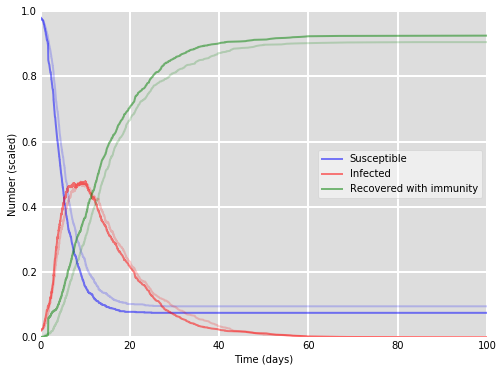

In [40]:
# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 20, 0
I, R = [], []

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
S = []

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 

# Vaccines
PercentageV = 0.05;
V=PercentageV*N; V = int(V);

##Time
PercentageT = 0.2; 
Tvac = PercentageT*tvecv[np.argmax(Iv)]
Tmax=160; tvec=[]; tt=0;

##Network
G=nx.barabasi_albert_graph(N,2);

##Node attributes
Inf=list(rand.choice(range(N), I0, replace=False));
Susc=G.nodes();  
for xx in Inf: Susc.remove(xx);
Rem = [];

##Gillespie
while (tt<Tvac):
    
    S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
    
    if I0 == 0: 
        tt = Tmax;
        S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
        break
        
    ##Neighbors
    nInfvec = np.zeros(N);
    for zz in Susc:
        neighbors = G.neighbors(zz);
        for ii in xrange(len(neighbors)):
            if Inf.count(neighbors[ii]) == 1:
                nInfvec[zz] += 1; 
        
    ##Time
    p1vec=beta*nInfvec
    p1 = sum(p1vec) ##Susc. to Inf.
    Ivec=np.zeros(N); Ivec[Inf]=1; p2vec=gamma*Ivec;
    p2 = sum(p2vec) ##Inf. to Rem.  
    pvec = np.array([p1, p2]);
    tau = 1/sum(pvec);
    dt = np.random.exponential(tau); tt += dt;
    
    #Probabilities
    pch = np.concatenate((p1vec,p2vec))
    pnorm = pch/sum(pch);
    
    ##Choose event
    event = np.random.choice(range(len(pch)), 1, replace=False , p=pnorm);  ##Random wighted choice
    event = event[0];
    
    ##target
    if event >= N: target = event - N;
    else: target = event;
    
    ##Dynamics    
    if (event < N): 
        S0 = S0 - 1; I0 = I0 + 1;
        Susc.remove(target); Inf.append(target);
     
    elif (event >= N): 
        I0 = I0 - 1; R0 = R0 + 1;
        Inf.remove(target); Rem.append(target);
        
##Vaccine
Pop=G.nodes();
for ii in xrange(V):
    
    target=np.random.choice(Pop,1); Pop.remove(target);

    if (Susc.count(target) == 1):
        S0 = S0 - 1; R0 = R0 + 1;
        Susc.remove(target); Rem.append(target);

    elif (Inf.count(target) == 1):
        I0 = I0 - 1; R0 = R0 + 1;
        Inf.remove(target); Rem.append(target);
        
##Gillespie
while (tt<Tmax):
    
    S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
    
    if I0 == 0: 
        tt = Tmax;
        S.append(S0); I.append(I0); R.append(R0); tvec.append(tt);
        break
        
    ##Neighbors
    nInfvec = np.zeros(N);
    for zz in Susc:
        neighbors = G.neighbors(zz);
        for ii in xrange(len(neighbors)):
            if Inf.count(neighbors[ii]) == 1:
                nInfvec[zz] += 1; 
        
    ##Time
    p1vec=beta*nInfvec
    p1 = sum(p1vec) ##Susc. to Inf.
    Ivec=np.zeros(N); Ivec[Inf]=1; p2vec=gamma*Ivec;
    p2 = sum(p2vec) ##Inf. to Rem.  
    pvec = np.array([p1, p2]);
    tau = 1/sum(pvec);
    dt = np.random.exponential(tau); tt += dt;
    
    #Probabilities
    pch = np.concatenate((p1vec,p2vec))
    pnorm = pch/sum(pch);
    
    ##Choose event
    event = np.random.choice(range(len(pch)), 1, replace=False , p=pnorm);  ##Random wighted choice
    event = event[0];
    
    ##target
    if event >= N: target = event - N;
    else: target = event;
    
    ##Dynamics    
    if (event < N): 
        S0 = S0 - 1; I0 = I0 + 1;
        Susc.remove(target); Inf.append(target);
     
    elif (event >= N): 
        I0 = I0 - 1; R0 = R0 + 1;
        Inf.remove(target); Rem.append(target);

S = np.asarray(S);
I = np.asarray(I);
R = np.asarray(R);
tvec = np.asarray(tvec);
N = float(N);

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize = (8,6))
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(tvec, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(tvecv, Sv/N, '-b', alpha=0.2, lw=2)
ax.plot(tvec, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(tvecv, Iv/N, '-r', alpha=0.2, lw=2)
ax.plot(tvec, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(tvecv, Rv/N, '-g', alpha=0.2, lw=2)
ax.set_xlabel('Time (days)')
ax.set_xlim(0,100)
ax.set_ylabel('Number (scaled)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)